# Support Vector Machines
# Prepare a classification model using SVM for salary data 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
test_data = pd.read_csv("SalaryData_Test(1).csv")
train_data = pd.read_csv("SalaryData_Train(1).csv")

In [3]:
test = test_data.copy()
train = train_data.copy()

In [4]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [5]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

/Users/prudhvipaka/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary', ylabel='count'>

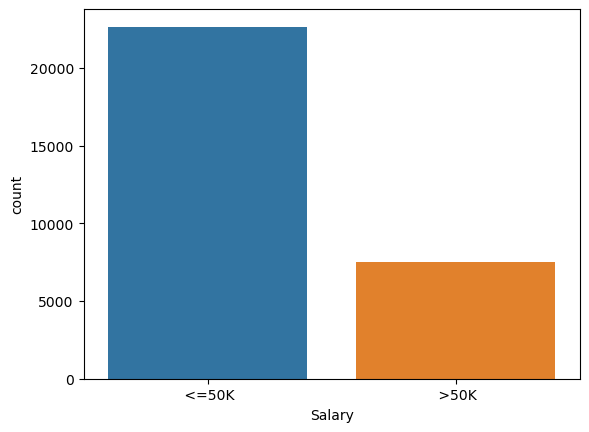

In [8]:
sns.countplot(train["Salary"])

In [9]:
train1 = train.apply(LabelEncoder().fit_transform)
train1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [10]:
test1 = test.apply(LabelEncoder().fit_transform)
test1.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [33]:
df = train.append(test) 

/var/folders/3h/2h464gjj2_lc5skvv2jv8vw80000gn/T/ipykernel_20091/2767323617.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train.append(test)


In [34]:
df.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,38.548086,10.118463,1101.454700,88.548617,40.938038
std,13.217981,2.552909,7506.511295,404.838249,12.007640
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [35]:
corr = df.corr()

<AxesSubplot:>

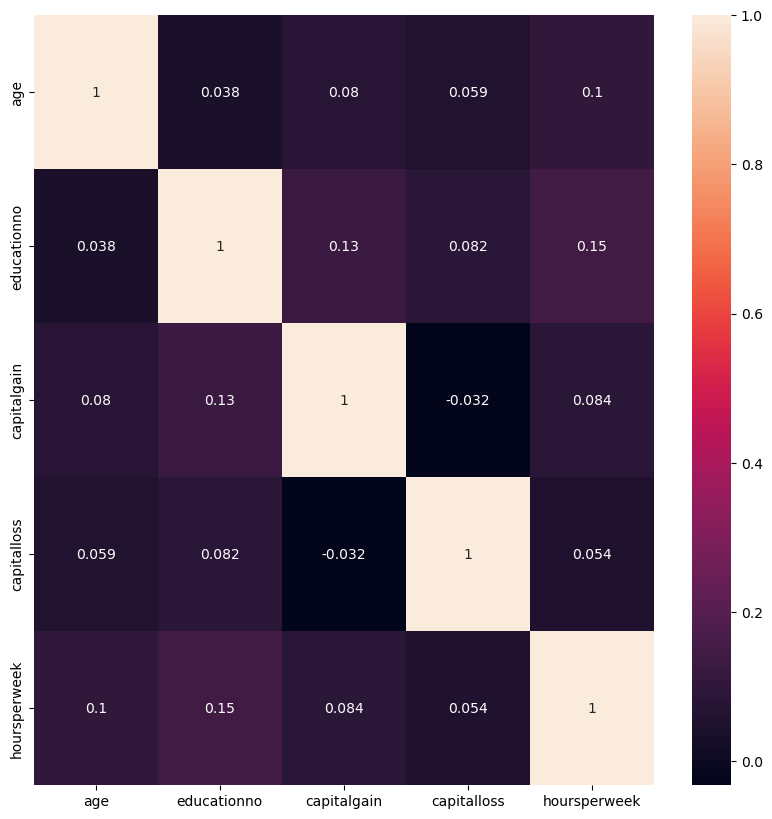

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

# Support Vector Machine

In [15]:
X_train = train1.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis=1)
Y_train = train1["Salary"]

In [16]:
print(np.unique(Y_train))

[0 1]


In [17]:
X_train.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,22,12,0,24,0,39,0
1,33,12,3,0,0,12,0
2,21,8,5,0,0,39,0
3,36,6,5,0,0,39,0
4,11,12,9,0,0,39,0


In [18]:
X_test = test1.drop(['workclass','education','relationship','native','maritalstatus','sex','race'],axis=1)
Y_test = test1["Salary"]

In [19]:
print(np.unique(Y_test))

[0 1]


In [20]:
X_test.head()

,age,educationno,occupation,capitalgain,capitalloss,hoursperweek,Salary
0,8,6,6,0,0,39,0
1,21,8,4,0,0,49,0
2,11,11,10,0,0,39,1
3,27,9,6,87,0,39,1
4,17,5,7,0,0,29,0


In [21]:
X_train.shape, Y_train.shape

((30161, 7), (30161,))

In [22]:
X_test.shape, Y_test.shape

((15060, 7), (15060,))

# Linear Support Vector Machine

In [23]:
svc = SVC(gamma = 0.22)
svc.fit(X_train, Y_train)

SVC(gamma=0.22)

In [24]:
score_svc = svc.score(X_test, Y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.9072377158034528


# Radical Support Vector Machine

In [25]:
svc_radical = svm.SVC(kernel='rbf', C=1, gamma = 0.22)
svc_radical.fit(X_train, Y_train.values.ravel())

SVC(C=1, gamma=0.22)

In [26]:
score_svc_radical = svc_radical.score(X_test, Y_test)
print("The Accuracy of Radical SVC Model is", score_svc_radical)

The Accuracy of Radical SVC Model is 0.9072377158034528


# Sigmoid SVC Model

In [27]:
svc_sigmoid = svm.SVC(kernel = 'sigmoid',C=1, gamma =0.22)
svc_sigmoid.fit(X_train,Y_train.values.ravel())

SVC(C=1, gamma=0.22, kernel='sigmoid')

In [28]:
score_svc_sigmoid = svc_sigmoid.score(X_test, Y_test)
print("The Accuracy of sigmoid SVC Model is", score_svc_sigmoid)

The Accuracy of sigmoid SVC Model is 0.7543160690571049


# Poly SVC Model

In [37]:
svc_radical = svm.SVC(kernel = 'poly', C=1,gamma = 0.33)
svc_radical.fit(X_train, Y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test, Y_test)
print('The accuracy of poly SVC Model is', score_svc_radical)

The accuracy of poly SVC Model is 0.999933598937583


In [38]:
clf = SVC(kernel = 'poly', C=1, gamma = 0.33)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 99.99335989375831


array([[11360,     0],
       [    1,  3699]])

In [39]:
print(classification_report(test1['Salary'], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11360
           1       1.00      1.00      1.00      3700

    accuracy                           1.00     15060
   macro avg       1.00      1.00      1.00     15060
weighted avg       1.00      1.00      1.00     15060



# Poly SVC Model predict test dataset with 99.99% accuracy 